In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Highest Cancellation Rate by Country

In [2]:
# load Data
df = pd.read_csv('hotel_clean_all_countries.csv')

In [3]:
# Total bookings and cancellations per country + month
summary = df.groupby(['country', 'arrival_month'])['is_canceled'].agg(['count', 'sum']).reset_index()
summary.rename(columns={'count': 'total_bookings', 'sum': 'cancellations'}, inplace=True)

# Calculate cancellation rate
summary['cancellation_rate'] = summary['cancellations'] / summary['total_bookings']
sorted_countries = summary.sort_values(by=['cancellation_rate'], ascending=False)

sorted_countries.drop_duplicates(subset='country').head(6)

,country,arrival_month,total_bookings,cancellations,cancellation_rate
406,GEO,4,1,1,1.0
1131,VGB,8,1,1,1.0
1068,TWN,2,3,3,1.0
103,BEN,5,2,2,1.0
249,CYP,4,5,5,1.0
107,BGD,6,1,1,1.0


### How many countries have at least one month with 100% cancellation rate?

In [4]:
sorted_countries = sorted_countries.drop_duplicates(subset='country')
all_cancelled = sorted_countries[sorted_countries['cancellation_rate']==1.0]
all_cancelled['total_bookings'].describe()

count    67.000000
mean      2.044776
std       1.878368
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max      10.000000
Name: total_bookings, dtype: float64

# Try again after consolidation of smaller booking countries

In [5]:
df = pd.read_csv('hotel_cleaned_no_encoding.csv')

In [6]:
# Total bookings and cancellations per country + month
summary = df.groupby(['country', 'arrival_month'])['is_canceled'].agg(['count', 'sum']).reset_index()
summary.rename(columns={'count': 'total_bookings', 'sum': 'cancellations'}, inplace=True)

# Calculate cancellation rate
summary['cancellation_rate'] = summary['cancellations'] / summary['total_bookings']
sorted_countries = summary.sort_values(by=['cancellation_rate'], ascending=False)

sorted_countries.drop_duplicates(subset='country').head(6)

,country,arrival_month,total_bookings,cancellations,cancellation_rate
324,LUX,1,4,4,1.000000
371,NOR,12,1,1,1.000000
497,TUR,7,10,8,0.800000
1,AGO,2,52,40,0.769231
316,KOR,5,20,15,0.750000
243,HUN,4,18,12,0.666667


Again, very low booking counts so...

# Trying again with total number of bookings

In [7]:
sorted_countries = summary.sort_values(by=['cancellations'], ascending=False)
sorted_countries.drop_duplicates(subset='country').head(6)

,country,arrival_month,total_bookings,cancellations,cancellation_rate
427,PRT,9,4769,3143,0.659048
175,ESP,8,1705,501,0.293842
211,FRA,8,1309,343,0.262032
220,GBR,5,1557,342,0.219653
295,ITA,8,663,275,0.414781
136,DEU,5,873,167,0.191294


## Showing relationship between booking numbers and cancellations

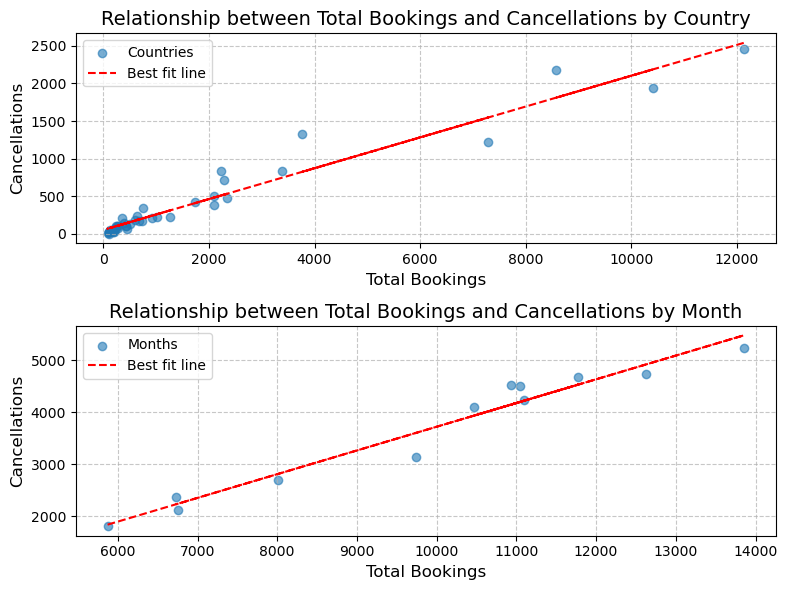

In [8]:
c_booking_data = df.groupby('country')['is_canceled'].agg(['count', 'sum'])
c_booking_data.columns = ['total_bookings', 'cancellations']
c_booking_data = c_booking_data.sort_values(by='cancellations', ascending=False)[1:]  # remove Portugal as is outlier, easier to see pattern without

m_booking_data = df.groupby('arrival_month')['is_canceled'].agg(['count', 'sum'])
m_booking_data.columns = ['total_bookings', 'cancellations']

fig, axes = plt.subplots(2, 1, figsize=(8, 6))
axes = axes.flatten()

for i, topic in enumerate(['Country', 'Month']):
    if topic == 'Country':
        x = c_booking_data['total_bookings']
        y = c_booking_data['cancellations']
        label = 'Countries'
    else:
        x = m_booking_data['total_bookings']
        y = m_booking_data['cancellations']
        label = 'Months'

    # Find line of best fit
    a, b = np.polyfit(x, y, 1)
    line = a * x + b

    axes[i].scatter(x, y, alpha=0.6, label=label)
    axes[i].plot(x, line, color='red', linestyle='--', label='Best fit line')

    axes[i].set_title(f'Relationship between Total Bookings and Cancellations by {topic}', fontsize=14)
    axes[i].set_xlabel('Total Bookings', fontsize=12)
    axes[i].set_ylabel('Cancellations', fontsize=12)

    axes[i].legend()
    axes[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()